In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [26]:
input_data = pd.read_csv('data/1011PVtest.csv')
fnamevar = "variables_pv1020.dat"

In [27]:
input_data.columns = ['Time', 'V', 'I', 'Is']
input_data.drop(columns='Is', inplace=True)
input_data.set_index('Time', inplace=True)

In [28]:
step_time = input_data.index[1] - input_data.index[0]
dI_dt = (input_data.I.to_numpy()[2:] - input_data.I.to_numpy()[:-2]) / step_time / 2
dV_dt = (input_data.V.to_numpy()[2:] - input_data.V.to_numpy()[:-2]) / step_time / 2

In [29]:
lines = open(fnamevar, "r").readlines()
# read output data in fnamevar (this line is a long story...)
Chat = np.array(
    [
        np.fromstring(
            min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line), key=len),
            sep=",",
        )
        for line in lines
    ]
)

In [30]:
# Kt, Rs, Rsh, Iso
Kt = Chat[:, 0]
Rs = Chat[:, 1]
Rsh = Chat[:, 2] * 1e4
Iso = Chat[:, 3]

In [31]:
left = 1 + Iso*Rs/Kt*np.exp((np.repeat(np.reshape(input_data.V.to_numpy()[1:-1],(-1,1)), Chat.shape[0], axis =1)+np.outer(input_data.I.to_numpy()[1:-1], Rs))/Kt)  + Rs/Rsh

In [32]:
right = - np.repeat(np.reshape(dV_dt,(-1,1)), Chat.shape[0], axis =1) * (Iso/Kt*np.exp((np.repeat(np.reshape(input_data.V.to_numpy()[1:-1],(-1,1)), Chat.shape[0], axis =1)+np.outer(input_data.I.to_numpy()[1:-1], Rs))/Kt) + 1/Rsh)

In [33]:
result = left*np.repeat(np.reshape(dI_dt,(-1,1)), Chat.shape[0], axis =1) - right

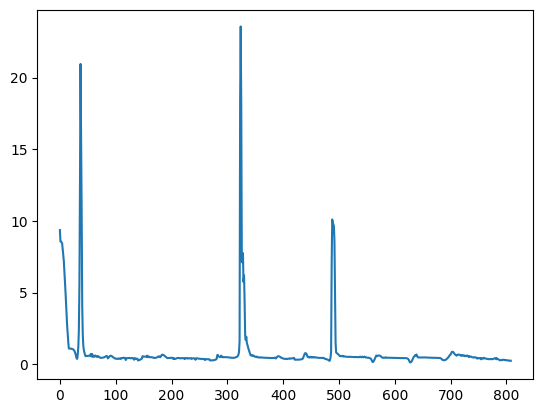

In [34]:
plt.plot(np.mean(np.abs(result), axis=0))

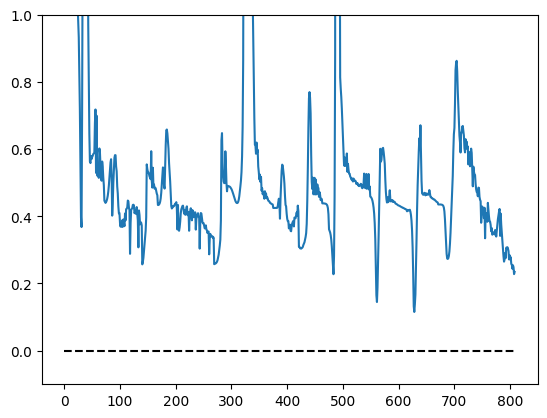

In [35]:
plt.figure()
plt.plot(np.mean(np.abs(result), axis=0))
plt.plot(range(Chat.shape[0]), np.ones(Chat.shape[0]) * 0, "k--")
plt.ylim((-0.1, 1))
plt.show()

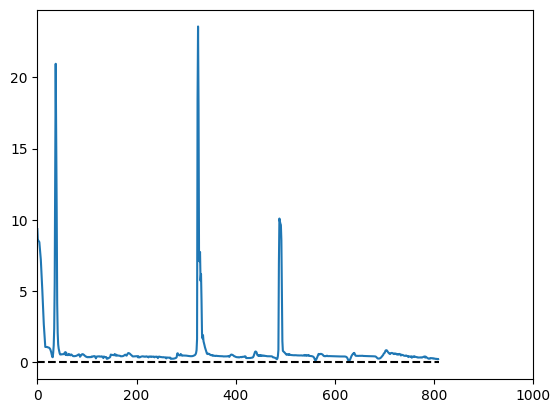

In [36]:
plt.figure()
plt.plot(np.mean(np.abs(result), axis=0))
plt.plot(range(Chat.shape[0]), np.ones(Chat.shape[0]) * 0, "k--")
plt.xlim((0, 1000))
plt.show()